In [1]:
# https://bastings.github.io/annotated_encoder_decoder/
import os
import numpy as np
import pandas as pd
import pickle
from functools import reduce
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utils import Vocabulary, FOLDER_PATH,DATA_FILES

In [2]:
with open(os.path.join(FOLDER_PATH,DATA_FILES[3]),'rb') as f:
    vocab_ingrs=pickle.load(f)

with open(os.path.join(FOLDER_PATH,DATA_FILES[4]),'rb') as f:
    vocab_toks=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[0]),'rb') as f:
    ingrs_count=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,DATA_FILES[1]),'rb') as f:
    tokens_count=pickle.load(f)
    
with open(os.path.join(FOLDER_PATH,"normalized",DATA_FILES[2]),'rb') as f:
    recipes=pickle.load(f)

In [3]:
recipes_pd=pd.DataFrame(recipes)

In [4]:
tokens_count.most_common(30)

[('.', 5526316),
 (',', 3646076),
 ('and', 3298408),
 ('the', 3215253),
 ('in', 1680957),
 ('a', 1651714),
 ('to', 1628121),
 ('with', 1186772),
 ('until', 932030),
 ('add', 835463),
 ('of', 809827),
 ('minutes', 737664),
 ('for', 722802),
 ('heat', 568673),
 ('or', 562675),
 ('on', 530642),
 ('into', 510204),
 ('over', 459298),
 (';', 386917),
 ('bowl', 384456),
 ('cook', 371581),
 ('stir', 366431),
 ('mix', 344792),
 ('mixture', 341912),
 ('pan', 328432),
 ('salt', 326056),
 (')', 319568),
 ('(', 318020),
 ('about', 315881),
 ('is', 307990)]

In [5]:
# Average nb of ingredients per recipes
reduce(lambda x,value: x+len(value["ingredients"]),recipes,0)/len(recipes)

9.988957055214724

In [6]:
ingrs_count.most_common(20)

[('salt', 211868),
 ('butter', 142550),
 ('sugar', 124625),
 ('olive_oil', 97975),
 ('water', 91932),
 ('eggs', 88945),
 ('garlic_cloves', 77069),
 ('milk', 63222),
 ('onion', 61999),
 ('flour', 61783),
 ('onions', 54554),
 ('all_-_purpose_flour', 51937),
 ('brown_sugar', 45666),
 ('egg', 45631),
 ('pepper', 43565),
 ('baking_powder', 43398),
 ('salt_and_pepper', 41458),
 ('vegetable_oil', 39474),
 ('baking_soda', 35932),
 ('vanilla_extract', 33882)]

In [7]:
# Most used ingredients by cluster
cluster_count={}
for k in vocab_ingrs.idx2word.keys():
    cluster_count[k]=reduce(lambda x,value: x+ingrs_count[value],vocab_ingrs.idx2word[k],0)
sorted_cluster = sorted(vocab_ingrs.idx2word.items(), key=lambda kv: cluster_count[kv[0]],reverse=True)
[(x[0],x[1][:5],cluster_count[x[0]]) for x in sorted_cluster]

[(10,
  ['green_bell_pepper',
   'red_bell_pepper',
   'yellow_bell_pepper',
   'salt_and_black_pepper',
   'white_pepper'],
  321703),
 (7,
  ['salt', 'kosher_salt', 'garlic_salt', 'onion_salt', 'rock_salt'],
  267851),
 (30,
  ['granulated_sugar', 'sugar', 'brown_sugar', 'white_sugar', 'coarse_sugar'],
  259765),
 (12,
  ['olive_oil',
   'vegetable_oil',
   'extra_virgin_olive_oil',
   'oil',
   'oil_-_and_-_vinegar_dressing'],
  224565),
 (9,
  ['red_onion', 'white_onion', 'onion', 'onion_powder', 'dried_onion_flakes'],
  205505),
 (33,
  ['butter',
   'unsalted_butter',
   'salted_butter',
   'peanut_butter',
   'natural_-_style_peanut_butter'],
  193612),
 (2,
  ['american_cheese',
   'kraft_grated_parmesan_cheese',
   'cheddar_cheese',
   'shredded_cheddar_cheese',
   'cream_cheese'],
  192429),
 (59,
  ['egg', 'egg_whites', 'egg_yolk', 'egg_substitute', 'egg_white'],
  167246),
 (34,
  ['flour',
   'cake_flour',
   'all_-_purpose_flour',
   'plain_flour',
   'whole_wheat_flour']

In [8]:
# Average cluster size
reduce(lambda x,value: x+len(value),vocab_ingrs.idx2word.values(),0)/len(vocab_ingrs.idx2word.keys())

14.07375478927203

In [9]:
# Biggest cluster size
sorted_cluster_size = sorted(vocab_ingrs.idx2word.items(), key=lambda kv: len(kv[1]),reverse=True)
[(x[0],x[1][:5]) for x in sorted_cluster_size[:10]]

[(2,
  ['american_cheese',
   'kraft_grated_parmesan_cheese',
   'cheddar_cheese',
   'shredded_cheddar_cheese',
   'cream_cheese']),
 (10,
  ['green_bell_pepper',
   'red_bell_pepper',
   'yellow_bell_pepper',
   'salt_and_black_pepper',
   'white_pepper']),
 (22,
  ['lemon_juice',
   'fresh_lemon_juice',
   'white_cranberry_juice',
   'crushed_pineapple_in_juice',
   'tomato_juice']),
 (126,
  ['mushroom_soup',
   'condensed_cream_of_chicken_soup',
   "campbell's_cream_of_mushroom_soup",
   'cream_of_chicken_soup',
   'cream_of_mushroom_soup']),
 (27,
  ['chicken_thighs',
   'chicken_wings',
   'fryer_chicken',
   'boneless_skinless_chicken_breasts',
   'chicken_breasts']),
 (79,
  ['maple_syrup',
   'light_corn_syrup',
   'corn_syrup',
   'brown_rice_syrup',
   'light_syrup']),
 (77,
  ['cinnamon_-_swirl_bread',
   'focaccia_bread',
   'round_loaf_italian_bread',
   'bread_cubes',
   'bread']),
 (154,
  ['frozen_french_-_cut_green_beans',
   'black_beans',
   'kidney_beans',
   'dar

In [5]:
for recipe in recipes:
    if "champagne" in recipe["ingredients"] and "fresh_lemon_juice" in recipe["ingredients"]:
        print(recipe)

In [16]:
recipes_pd.loc[2,"ingredients"][0].am

In [6]:
recipes_pd["nb_ingrs"]=[len(x) for x in recipes_pd["ingredients"]]
recipes_pd["nb_instr"]=[len(x) for x in recipes_pd["instructions"]]    

In [7]:
nx, ny = recipes_pd["nb_ingrs"].max()+1,recipes_pd["nb_instr"].max()+1
ingr2instrCount=np.zeros((nx,ny))
for i in range(len(recipes_pd)):
    ingr2instrCount[recipes_pd.loc[i,"nb_ingrs"],recipes_pd.loc[i,"nb_instr"]]+=1
ingr2instrCount

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 259., 204.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 586., 499.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 561., 491.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 332., 357.],
       [  0.,   0.,   0.,

<IPython.core.display.Javascript object>


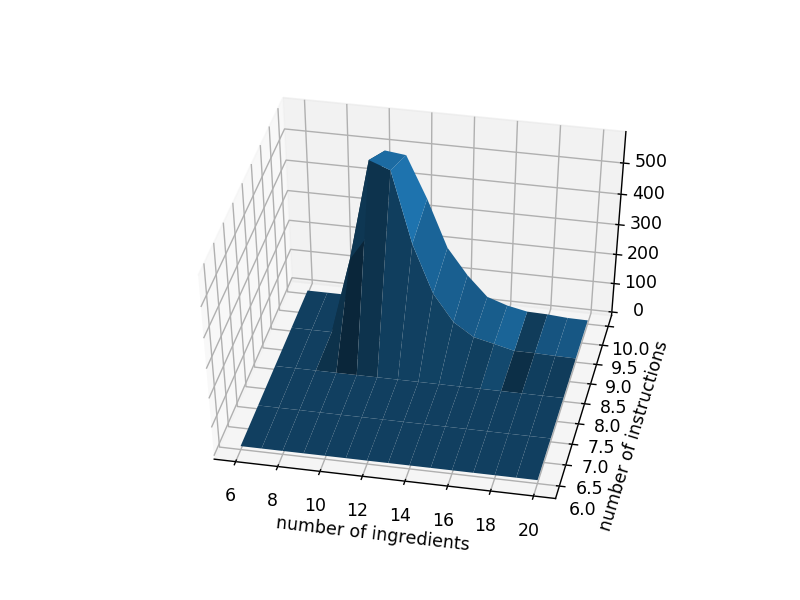

In [8]:
%matplotlib notebook

# Set up grid and test data
x = range(6,nx)
y = range(6,ny)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X.T, Y.T, ingr2instrCount[6:,6:])
ha.set_xlabel('number of ingredients')
ha.set_ylabel('number of instructions')

plt.show()